In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def create_maze(path) :
    maze = []
    with open(path, 'r') as f :
        for line in f :
            new_line = [int(line[0]=='.')]
            for i in range(50) :
                elem = line[3*i+1:3*i+4]
                new_line.append(int(elem[:2]=='..'))
                new_line.append(int(elem[2]=='.'))
            maze.append(new_line)
    return(np.array(maze))

def print_maze(mz, cmap) :
    plt.figure(figsize=(10, 10))
    plt.imshow(mz, cmap=cmap)
    plt.tight_layout()
    plt.show()

In [3]:
maze = create_maze('maze.mz.txt')

In [4]:
cmap_empty = ListedColormap(['black', 'white'])
cmap_solution = ListedColormap(['black', 'white', 'red'])

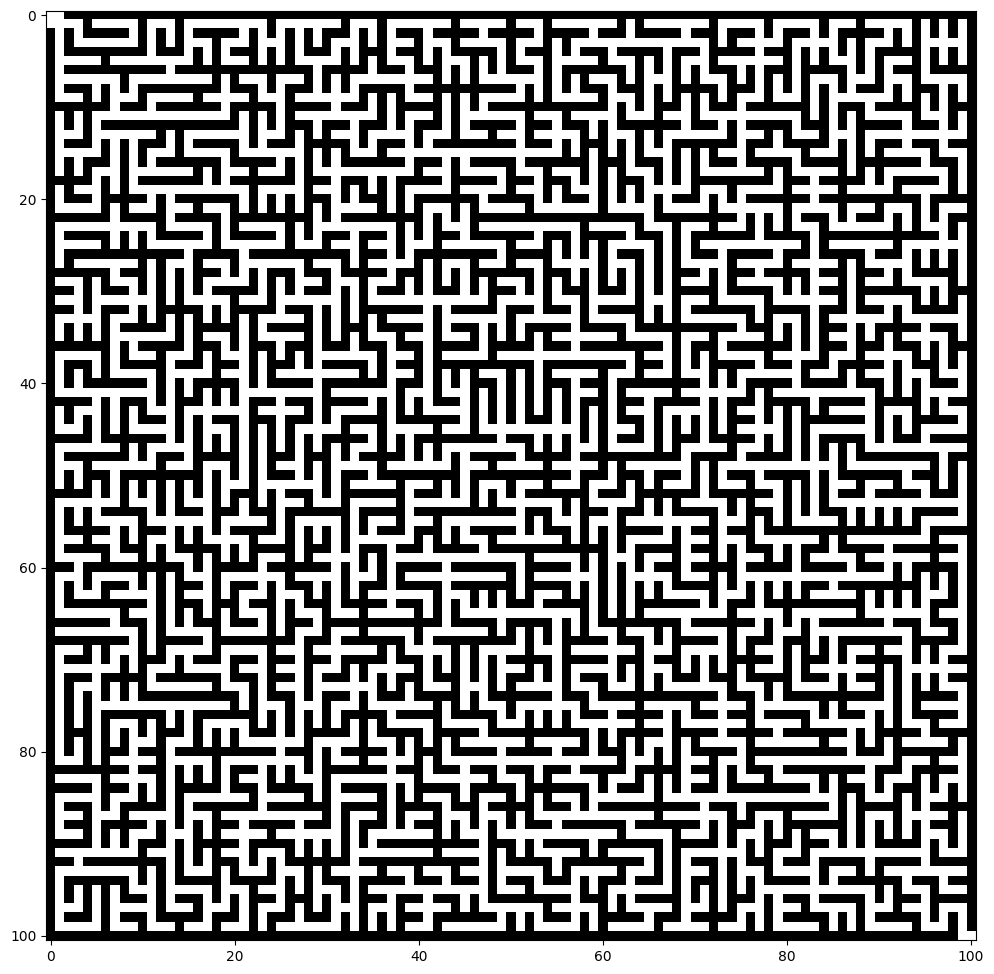

In [5]:
print_maze(maze,cmap_empty)

In [6]:
def neighbors(cell, mz) :
    n,m = mz.shape
    r,c = cell
    directions = [(0,1), (1,0), (0,-1), (-1,0)]
    list_n = []
    for x,y in directions :
        if 0<=r+x<n and 0<=c+y<m :
            if mz[r+x, c+y] :
                list_n.append((r+x, c+y))
    return(list_n)

def solve_laby(mz, cell, path, end=(100,100)) :
    if cell==end :
        path = path+[cell]
        return(True, path)
    else :
        neighs = neighbors(cell, mz)
        if len(path)!=0 :
            neighs.remove(path[-1])
        if len(neighs)==0 :
            return(False, [])
        else :
            for neigh in neighs :
                found, res = solve_laby(mz, neigh, path+[cell])
                if found :
                    return(True, res)
            return(False, [])

In [7]:
test = solve_laby(maze, (0, 0), [])[1]

In [9]:
maze_new = maze.copy()
for cell in test :
    maze_new[cell] = 2

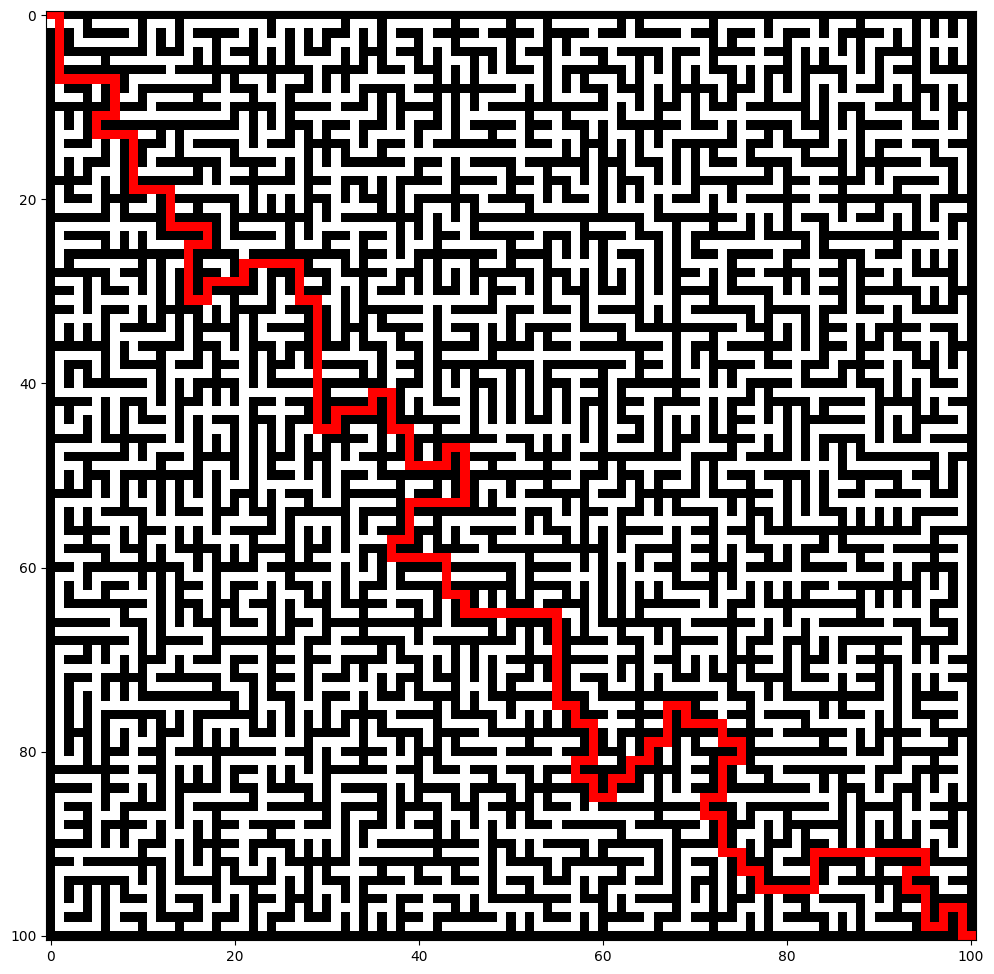

In [10]:
print_maze(maze_new, cmap=cmap_solution)